<a href="https://colab.research.google.com/github/dharmi15/Airbnb-Analysis/blob/main/Copy_of_Airbnb_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/AB_NYC_2019.csv'
df = pd.read_csv(file_path)

In [ ]:
list(df.columns)

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [ ]:
df.shape

(48895, 16)

In [ ]:
cat_col = df.select_dtypes(include ='object').columns
print(list(cat_col))

['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review']


In [ ]:
num_col = df.select_dtypes(exclude='object').columns
list(num_col)

['id',
 'host_id',
 'latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
data = df.drop(['id','last_review'],axis=1)

In [ ]:
data.shape

(48895, 14)

In [ ]:
data.isnull().sum()

name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
data.fillna({'name': 'not present' ,'host_name':'absent','reviews_per_month':0},inplace =True )

In [ ]:
data.isnull().sum(
)

name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
data.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
discontinued_listings=data[(data['price']==0) & (data['availability_365']==0)]
discontinued_listings

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
25634,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,0.71,5,0
25753,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,0.53,2,0
26259,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,0.00,1,0


In [ ]:
listings_with_0_price = data[(data['price']==0) & (data['availability_365']!=0)]
print(listings_with_0_price.shape)
(listings_with_0_price)

(8, 14)


,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
23161,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,0.05,4,28
25433,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2.56,4,127
25778,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,0.15,1,73
25794,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,4.28,6,176
25795,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,4.37,6,232
25796,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,4.35,6,222
26841,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,0.11,6,333
26866,Best Coliving space ever! Shared room.,101970559,Sergii,Brooklyn,Bushwick,40.69166,-73.90928,Shared room,0,30,5,0.26,6,139


In [ ]:
data=data.loc[data['price']>0]

In [ ]:
data.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.888400e+04,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000
mean,6.762203e+07,40.728953,-73.952176,152.755053,7.029887,23.271991,1.090800,7.144628,112.779498
std,7.861666e+07,0.054532,0.046159,240.170260,20.512224,44.551331,1.597213,32.956185,131.627271
min,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.817310e+06,40.690100,-73.983080,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079257e+07,40.723080,-73.955685,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763120,-73.936290,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


<ipython-input-28-d2ea4a644049>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  subplot(2,3,1)
<ipython-input-28-d2ea4a644049>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price'])
<ipython-input-28-d2ea4a644049>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the ne

<Axes: xlabel='availability_365', ylabel='Density'>

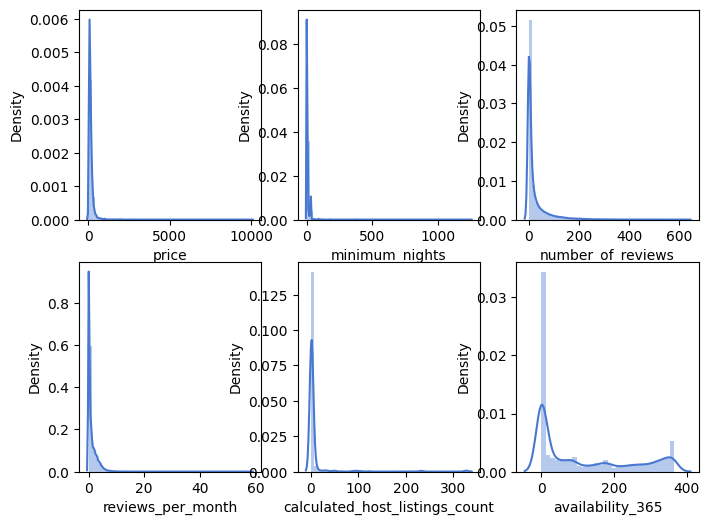

In [ ]:
sns.set_palette("muted")
from pylab import *
f, ax = plt.subplots(figsize=(8,6))

subplot(2,3,1)
sns.distplot(data['price'])

subplot(2,3,2)
sns.distplot(data['minimum_nights'])

subplot(2,3,3)
sns.distplot(data['number_of_reviews'])

subplot(2,3,4)
sns.distplot(data['reviews_per_month'])

subplot(2,3,5)
sns.distplot(data['calculated_host_listings_count'])

subplot(2,3,6)
sns.distplot(data['availability_365'])



<ipython-input-29-dd65af3c7ee8>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  subplot(2,3,1)


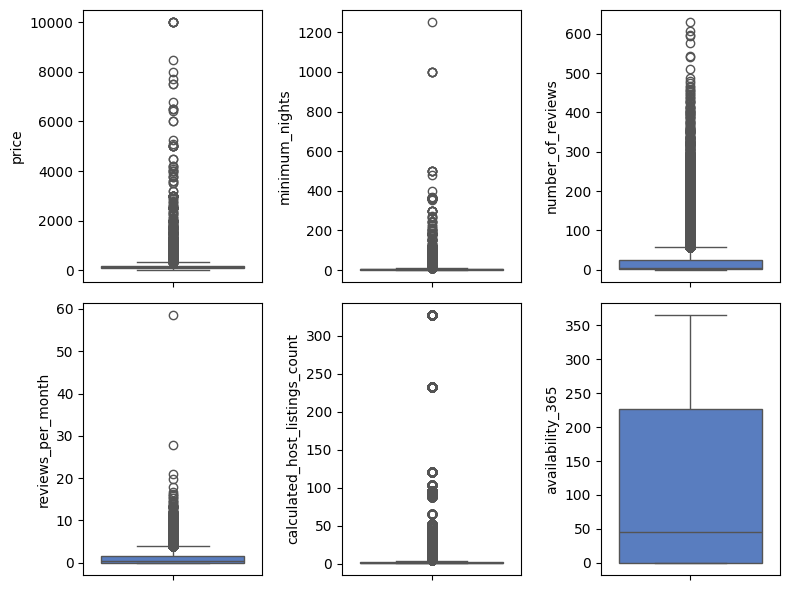

In [ ]:
from pylab import *
f, ax = plt.subplots(figsize=(8,6))

subplot(2,3,1)
sns.boxplot(y= data['price'])

subplot(2,3,2)
sns.boxplot(y= data['minimum_nights'])

subplot(2,3,3)
sns.boxplot(y= data['number_of_reviews'])

subplot(2,3,4)
sns.boxplot(y = data['reviews_per_month'])

subplot(2,3,5)
sns.boxplot(y = data['calculated_host_listings_count'])

subplot(2,3,6)
sns.boxplot(y = data['availability_365'])

plt.tight_layout()
plt.draw()


In [ ]:
list(data['neighbourhood_group'].unique())

['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

In [ ]:
data.neighbourhood_group.value_counts()

Manhattan        21660
Brooklyn         20095
Queens            5666
Bronx             1090
Staten Island      373
Name: neighbourhood_group, dtype: int64

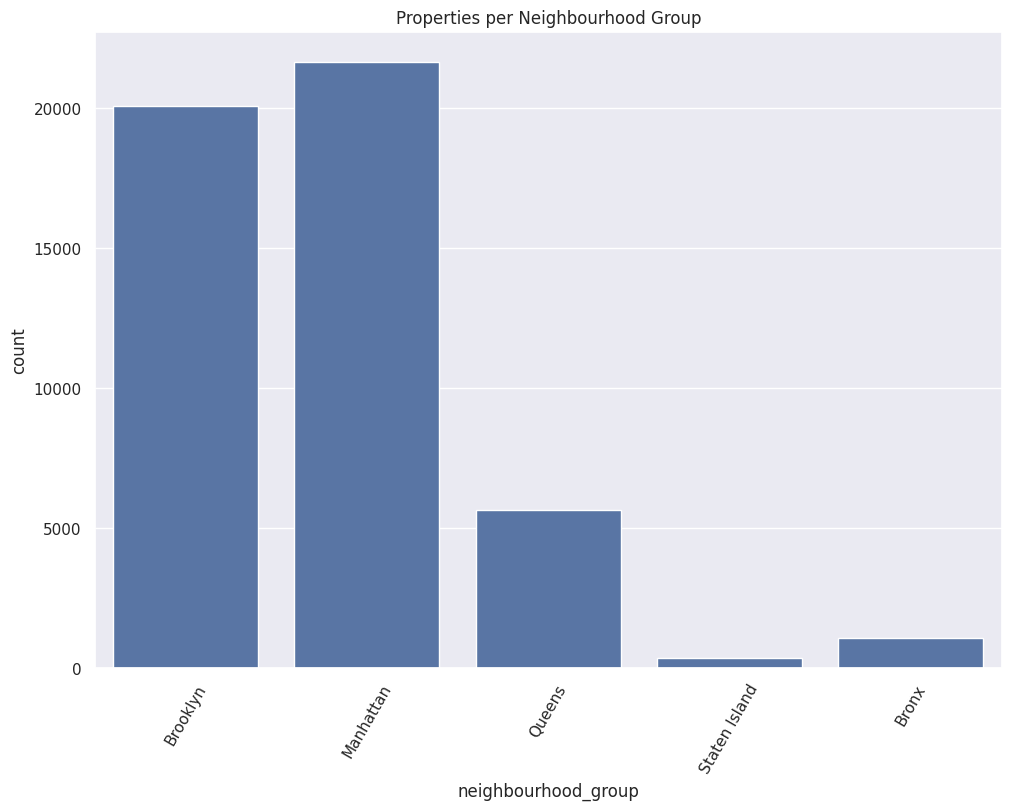

In [ ]:
#Checking properties in neighbourhood group
sns.set(rc={'figure.figsize':(11.7,8.27)})
title = 'Properties per Neighbourhood Group'
sns.countplot(data=data,x='neighbourhood_group')
plt.title(title)
plt.xticks(rotation=60)
plt.ioff()

In [ ]:
list(data['room_type'].unique())

['Private room', 'Entire home/apt', 'Shared room']

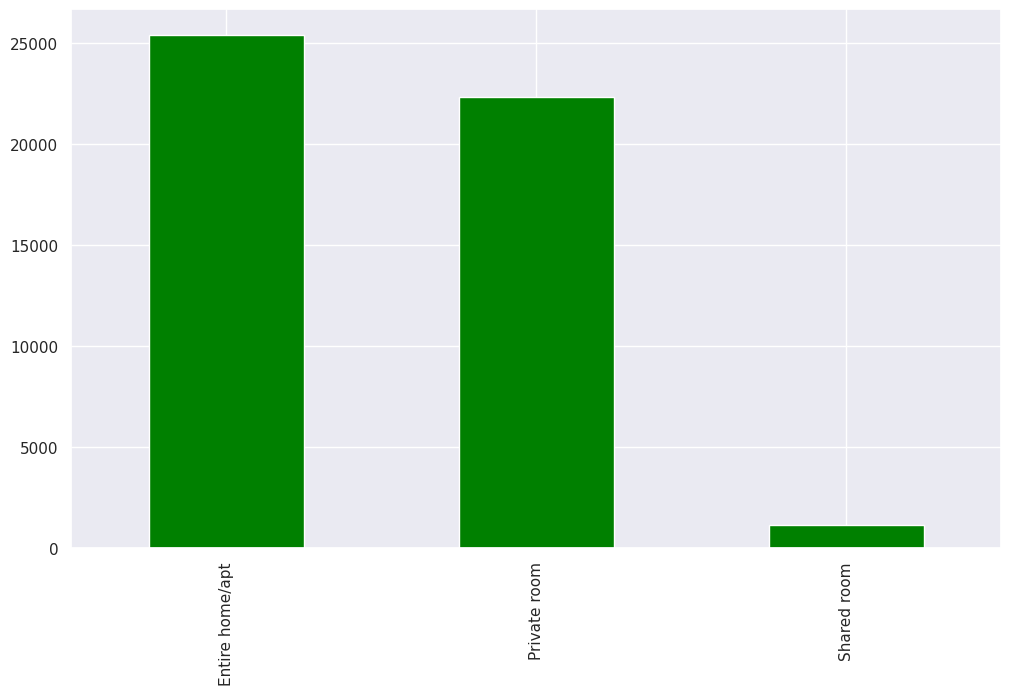

In [ ]:
data['room_type'].value_counts().plot(kind='bar',color='green',figsize=(12,7))
plt.show()

In [ ]:
renting_purpose= data[(data['availability_365']==365) & (data['room_type']=='Entire home/apt')]
print(renting_purpose.shape)
renting_purpose.head()

(485, 14)


,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
164,Charming & Cozy midtown loft any WEEK ENDS !!!,174025,Sylvia,Manhattan,Upper East Side,40.76123,-73.96420,Entire home/apt,250,3,4,0.08,1,365
181,Beautiful Queens Brownstone! - 5BR,204539,Mark,Queens,Ridgewood,40.70382,-73.89797,Entire home/apt,350,8,10,0.11,5,365
201,3 floors of luxury!,204539,Mark,Queens,Middle Village,40.71546,-73.87854,Entire home/apt,265,7,38,0.38,5,365
229,"Nice, clean, safe, convenient 3BR",204539,Mark,Queens,Ridgewood,40.70411,-73.89934,Entire home/apt,140,14,1,0.01,5,365
235,SpaHa Studio Monthly Rental,292204,Blanca,Manhattan,East Harlem,40.79163,-73.94573,Entire home/apt,125,28,183,1.83,2,365


In [ ]:
renting_purpose['neighbourhood_group'].value_counts()

Manhattan        316
Brooklyn         117
Queens            41
Bronx              9
Staten Island      2
Name: neighbourhood_group, dtype: int64

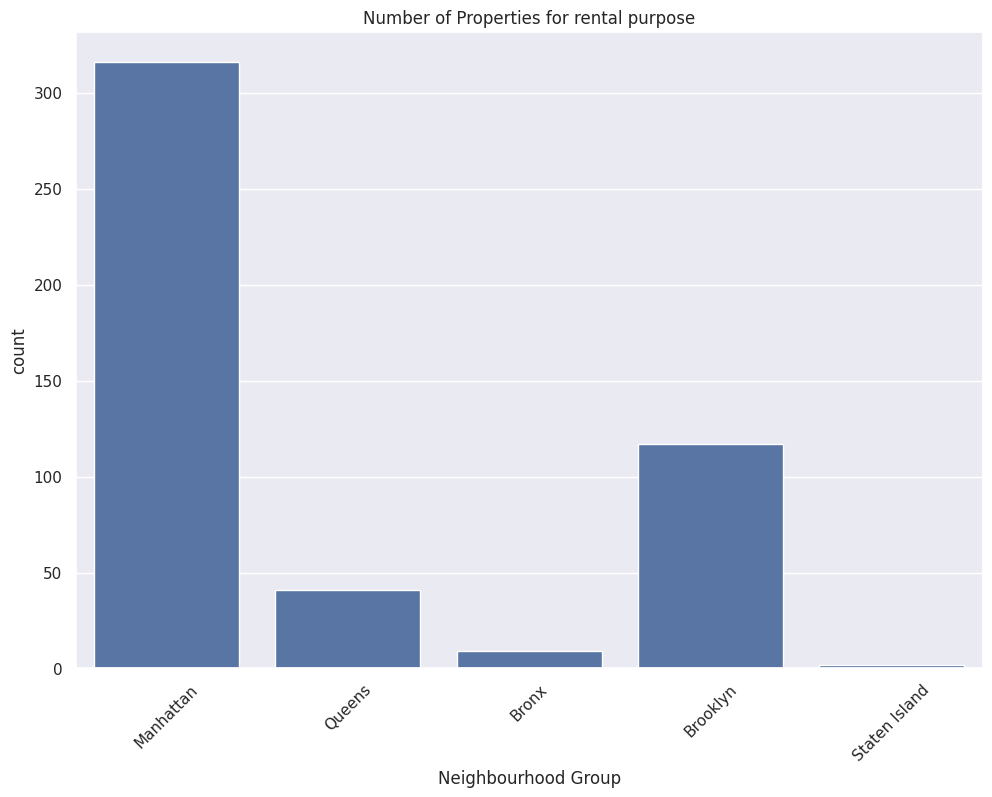

In [ ]:
#Checking properties for rental purpose
sns.set(rc={'figure.figsize':(11.7,8.27)})
title = 'Number of Properties for rental purpose'
sns.countplot(data=renting_purpose,x='neighbourhood_group')
plt.title(title)
plt.xlabel('Neighbourhood Group')
plt.ylabel('count')
plt.xticks(rotation= 45)
plt.show()

In [ ]:
#Top 5 listing
listings_count_df=data['name'].value_counts()[:5].reset_index()
listings_count_df.rename(columns={'index':'listings on Airbnb','name':'Total_listings'},inplace=True)
listings_count_df

,listings on Airbnb,Total_listings
0,Hillside Hotel,18
1,Home away from home,17
2,not present,16
3,New york Multi-unit building,16
4,Brooklyn Apartment,12


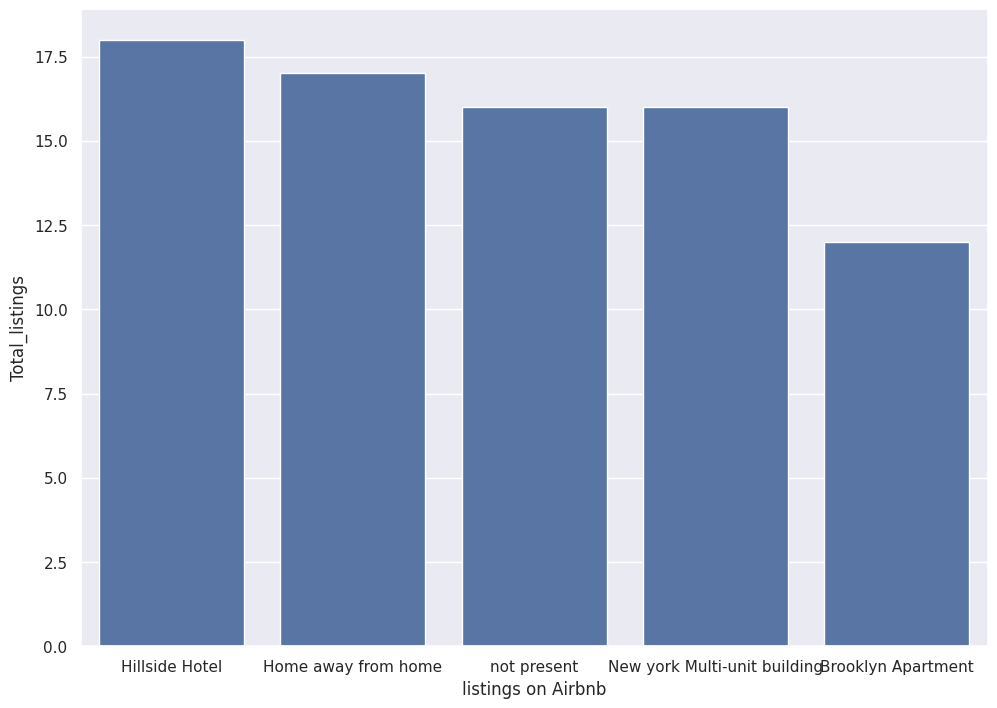

In [ ]:
sns.barplot(x='listings on Airbnb', y =('Total_listings'), data=listings_count_df)
plt.show()

In [ ]:
#Top 10 Host
top_10_hosts= data['host_name'].value_counts()[:10]
top_10_hosts

Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
Blueground      232
Sarah           227
Daniel          226
Jessica         205
Maria           204
Name: host_name, dtype: int64

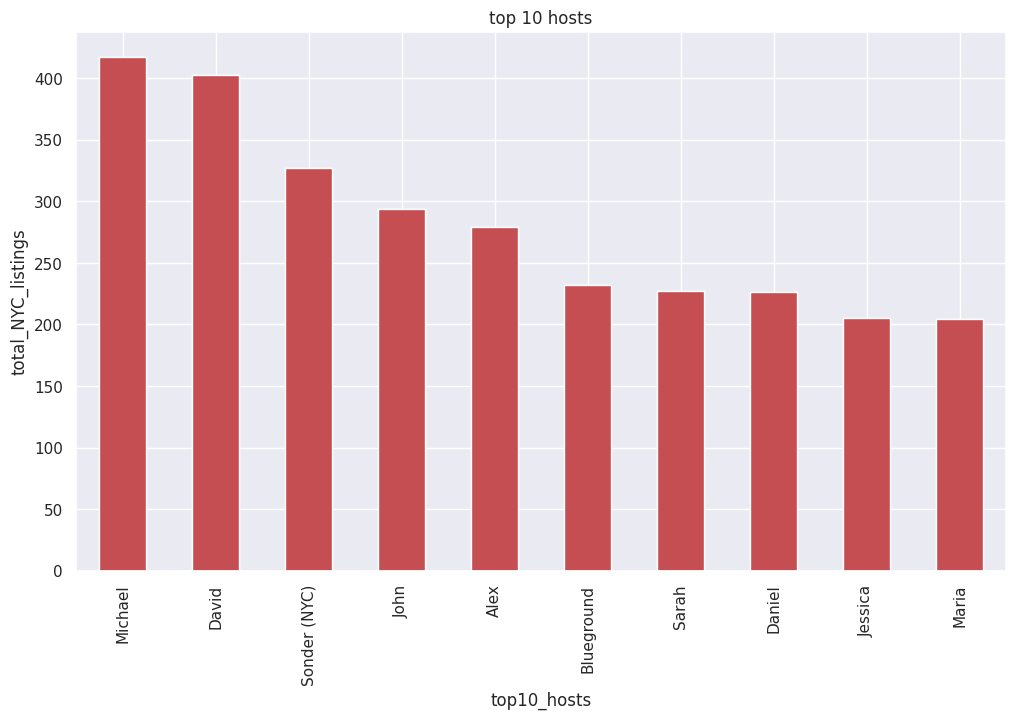

In [ ]:
top_10_hosts.plot(kind= 'bar',color='r',figsize=(12,7))
plt.xlabel('top10_hosts')
plt.ylabel('total_NYC_listings')
plt.title('top 10 hosts')
plt.show()

In [ ]:
print(data['neighbourhood'].nunique())
list(data['neighbourhood'].unique())

221


['Kensington',
 'Midtown',
 'Harlem',
 'Clinton Hill',
 'East Harlem',
 'Murray Hill',
 'Bedford-Stuyvesant',
 "Hell's Kitchen",
 'Upper West Side',
 'Chinatown',
 'South Slope',
 'West Village',
 'Williamsburg',
 'Fort Greene',
 'Chelsea',
 'Crown Heights',
 'Park Slope',
 'Windsor Terrace',
 'Inwood',
 'East Village',
 'Greenpoint',
 'Bushwick',
 'Flatbush',
 'Lower East Side',
 'Prospect-Lefferts Gardens',
 'Long Island City',
 'Kips Bay',
 'SoHo',
 'Upper East Side',
 'Prospect Heights',
 'Washington Heights',
 'Woodside',
 'Brooklyn Heights',
 'Carroll Gardens',
 'Gowanus',
 'Flatlands',
 'Cobble Hill',
 'Flushing',
 'Boerum Hill',
 'Sunnyside',
 'DUMBO',
 'St. George',
 'Highbridge',
 'Financial District',
 'Ridgewood',
 'Morningside Heights',
 'Jamaica',
 'Middle Village',
 'NoHo',
 'Ditmars Steinway',
 'Flatiron District',
 'Roosevelt Island',
 'Greenwich Village',
 'Little Italy',
 'East Flatbush',
 'Tompkinsville',
 'Astoria',
 'Clason Point',
 'Eastchester',
 'Kingsbridge',


In [ ]:
df1= data.groupby(['neighbourhood'])['host_id'].count().nlargest(10)
df1

neighbourhood
Williamsburg          3919
Bedford-Stuyvesant    3710
Harlem                2658
Bushwick              2462
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: host_id, dtype: int64

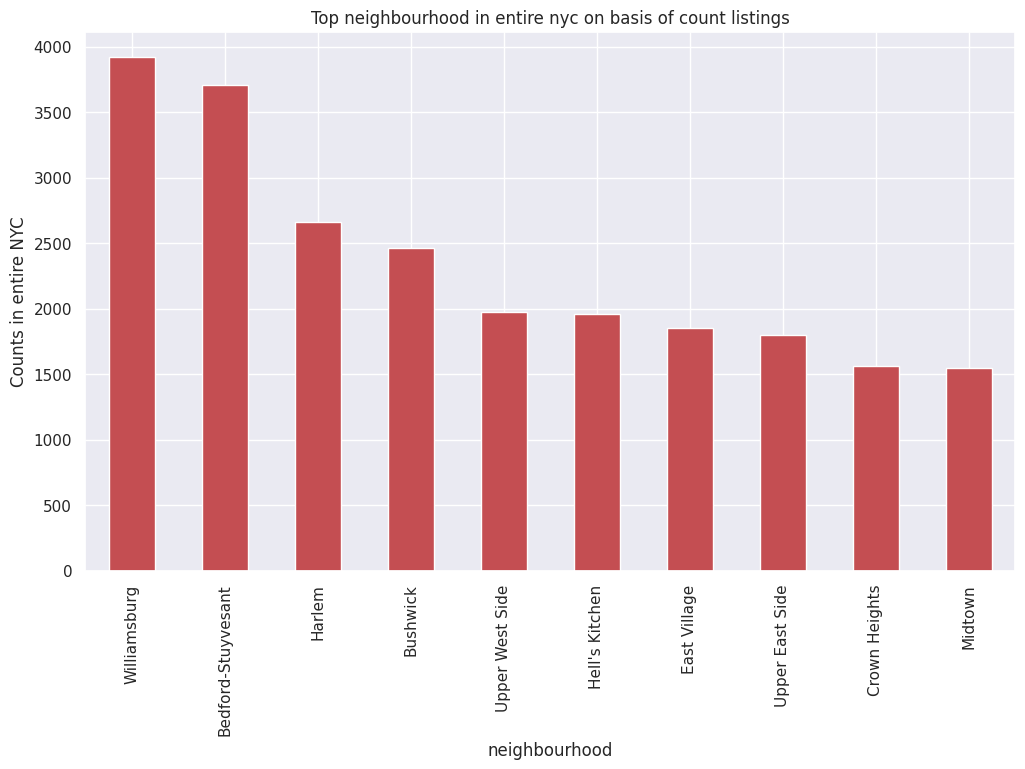

In [ ]:
top_10_neighbours= data['neighbourhood'].value_counts()[:10]
top_10_neighbours.plot(kind= 'bar',color='r',figsize=(12,7))
plt.xlabel('neighbourhood')
plt.ylabel('Counts in entire NYC')
plt.title('Top neighbourhood in entire nyc on basis of count listings')
plt.show()

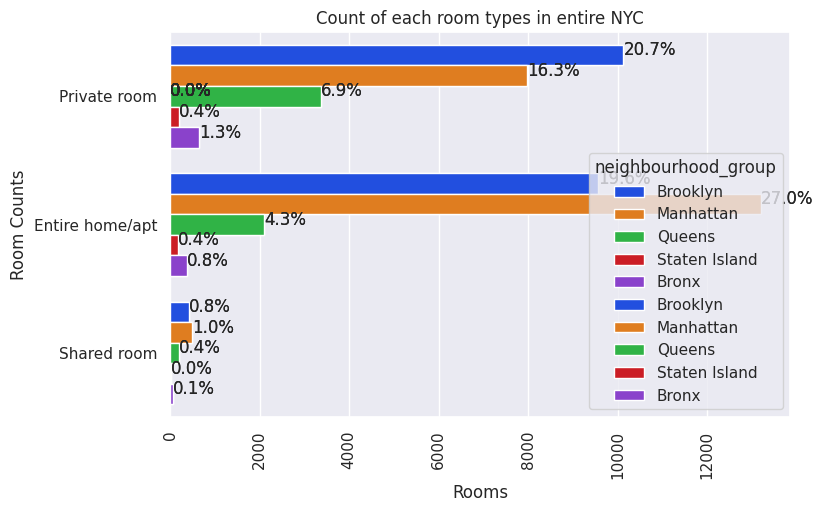

In [ ]:
plt.rcParams['figure.figsize'] = (8 , 5)
ax = sns.countplot(y='room_type', hue='neighbourhood_group', data=data,palette='bright')

total = len(data['room_type'])
for p in ax.patches:
  percentage='{:.1f}%'.format(100 * p.get_width()/total)
  x = p.get_x() + p.get_width() + 0.02
  y = p.get_y() + p.get_height()/2
  ax.annotate(percentage, (x,y))

plt.title('Count of each room types in entire NYC')
plt.xlabel('Rooms')
plt.xticks(rotation=90)
plt.ylabel('Room Counts')

plt.show()

In [ ]:
#Reviews of neighbourhood
areas_reviews = data.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index().sort_values(by = 'number_of_reviews', ascending= False)
areas_reviews

,neighbourhood_group,number_of_reviews
3,Queens,629
2,Manhattan,607
1,Brooklyn,488
4,Staten Island,333
0,Bronx,321


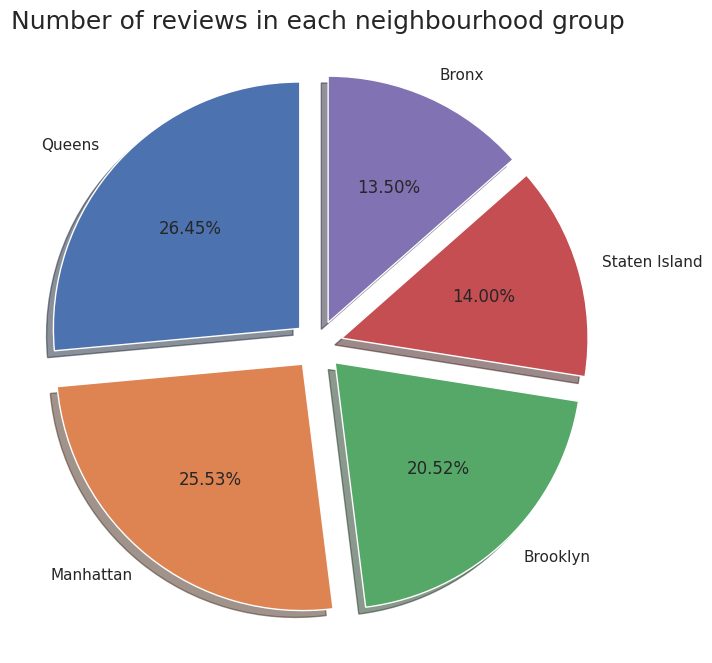

In [ ]:
plt.rcParams['figure.figsize'] = (13,8)
reviews = areas_reviews['number_of_reviews']
plt.pie(reviews,labels = areas_reviews['neighbourhood_group'], autopct = '%0.2f%%',startangle = 90, explode = [0.1,0.1,0.1,0.1,0.1], shadow = True)
plt.title('Number of reviews in each neighbourhood group', {'fontsize': 18})
plt.show()

<ipython-input-66-623b8e751d6e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),square=True,cmap='RdYlGn')


<Figure size 1500x700 with 0 Axes>

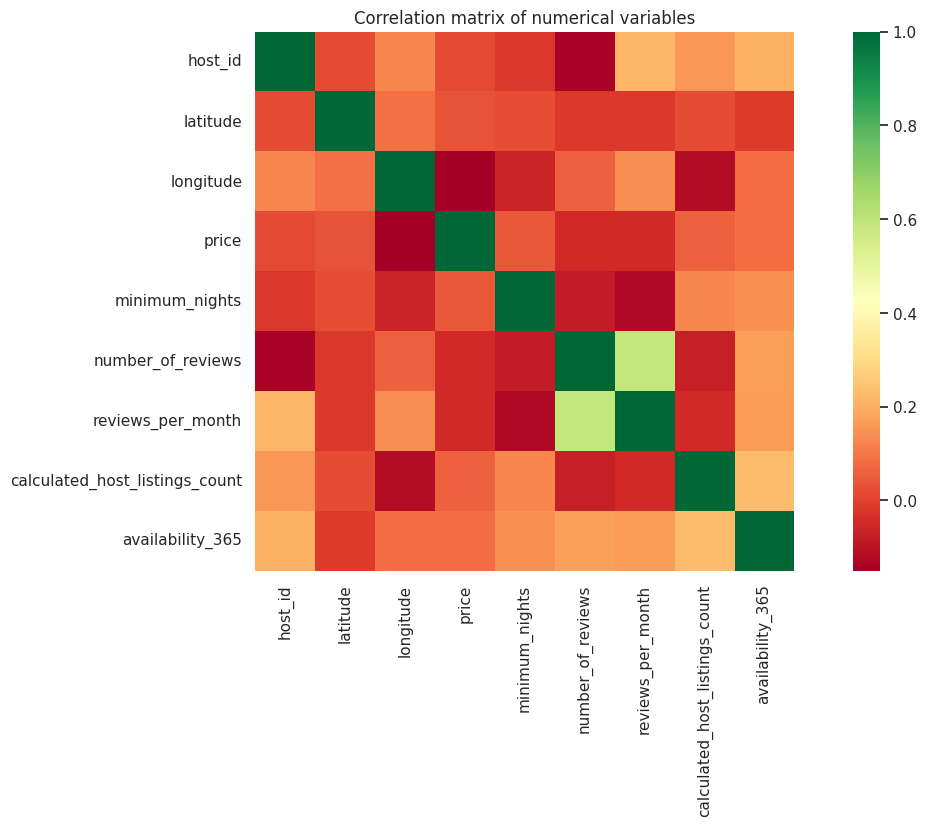

In [ ]:
plt.figure(figsize=(15,7))
title= 'Correlation matrix of numerical variables'
sns.heatmap(data.corr(),square=True,cmap='RdYlGn')
plt.title(title)
plt.show()

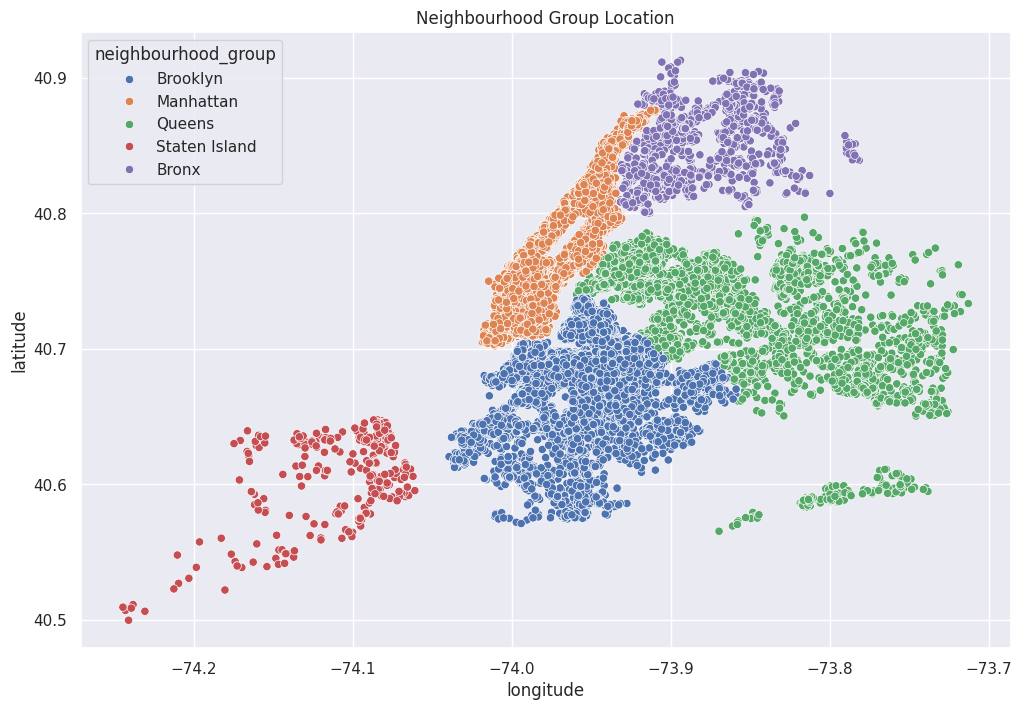

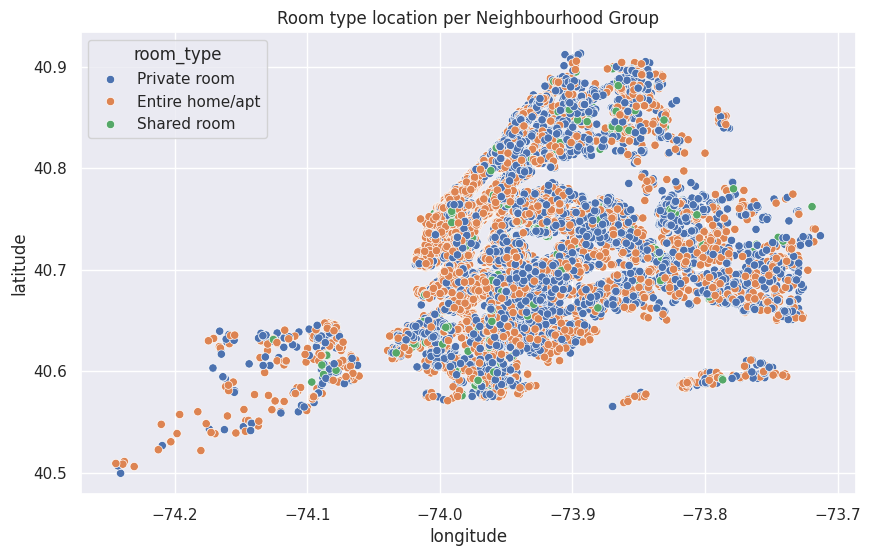

In [ ]:
title = 'Neighbourhood Group Location'
plt.figure(figsize=(12,8))
sns.scatterplot(data=data, x='longitude', y='latitude', hue='neighbourhood_group')
plt.title(title)
plt.show()

title= 'Room type location per Neighbourhood Group'
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='longitude', y='latitude', hue='room_type')
plt.title(title)
plt.show()

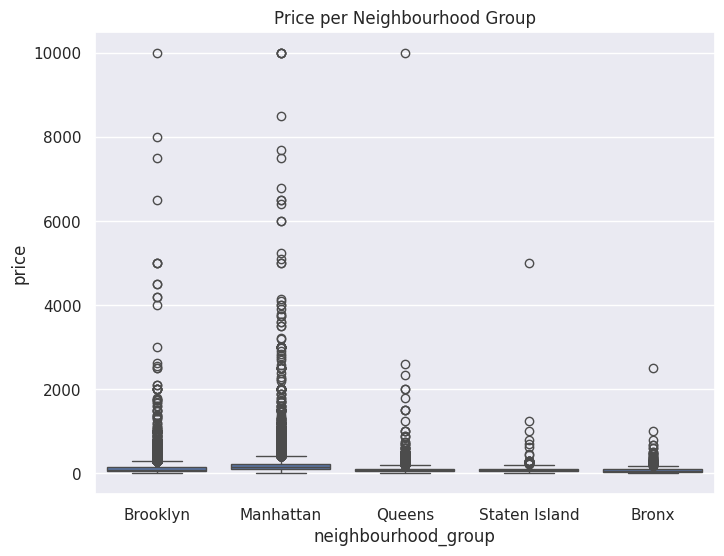

In [ ]:
#Price per Neighbourhood
x = 'neighbourhood_group'
y = 'price'
title = 'Price per Neighbourhood Group'

f, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x=x, y=y, data=data)
plt.title(title)
plt.show()

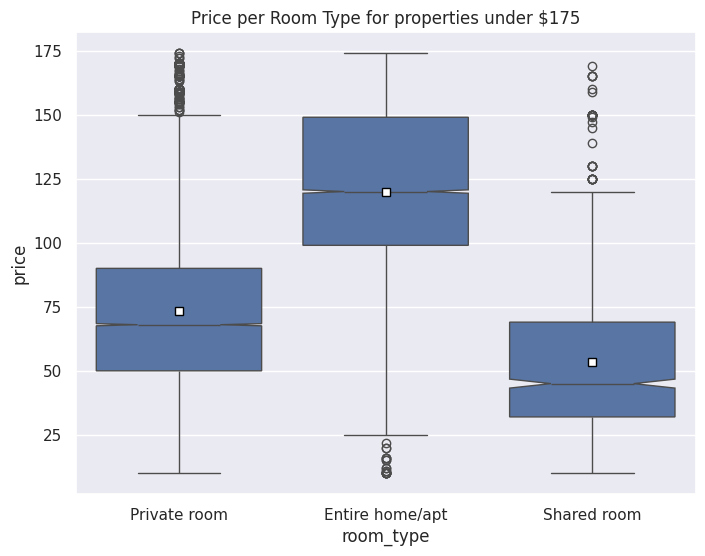

In [ ]:
title = 'Price per Room Type for properties under $175'
data_filtered = data.loc[data['price']<175]
f, ax =plt.subplots(figsize=(8,6))
sns.boxplot(x='room_type', y ='price', data=data_filtered, notch=True, showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"white","markeredgecolor":"black"})
plt.title(title)
plt.show()

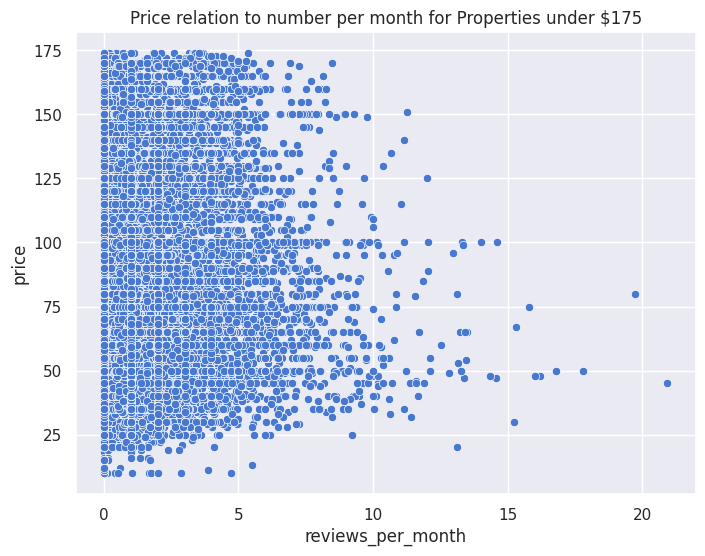

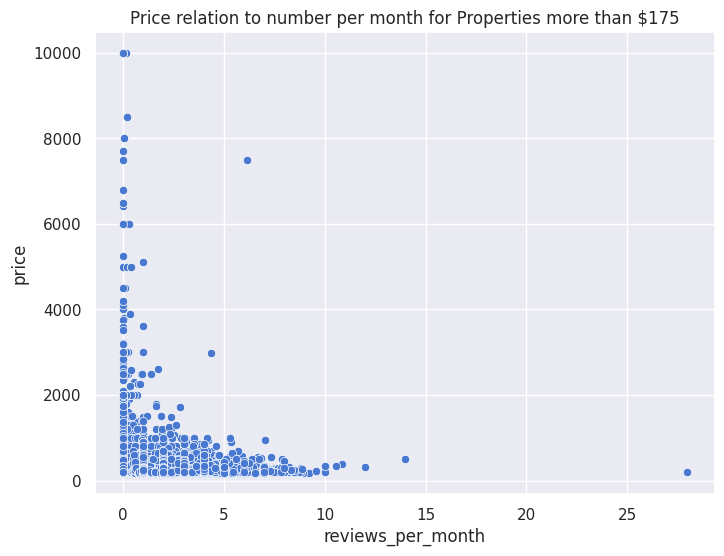

In [ ]:
sns.set_palette("muted")
x = 'reviews_per_month'
y = 'price'

title = 'Price relation to number per month for Properties under $175'
data_filtered = data.loc[(data['price'] < 175) & (data['reviews_per_month'] < 30)]
f, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x=x, y=y, data=data_filtered)
plt.title(title)
plt.ioff()

title = 'Price relation to number per month for Properties more than $175'
data_filtered = data.loc[(data['price'] > 175)]
f, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x=x, y=y, data=data_filtered)
plt.title(title)
plt.show()

In [ ]:
busiest_hosts = data.groupby(['host_name', 'room_type','neighbourhood_group'])['number_of_reviews'].max().reset_index()
busiest_hosts = busiest_hosts.sort_values(by = 'number_of_reviews', ascending =False).reset_index().head(10)
busiest_hosts

,index,host_name,room_type,neighbourhood_group,number_of_reviews
0,4597,Dona,Private room,Queens,629
1,8444,Jj,Private room,Manhattan,607
2,12043,Maya,Private room,Queens,543
3,2868,Carol,Private room,Manhattan,540
4,3987,Danielle,Private room,Queens,510
5,1637,Asa,Entire home/apt,Brooklyn,488
6,18270,Wanda,Private room,Brooklyn,480
7,10577,Linda,Private room,Queens,474
8,3934,Dani,Entire home/apt,Brooklyn,467
9,1179,Angela,Private room,Queens,466


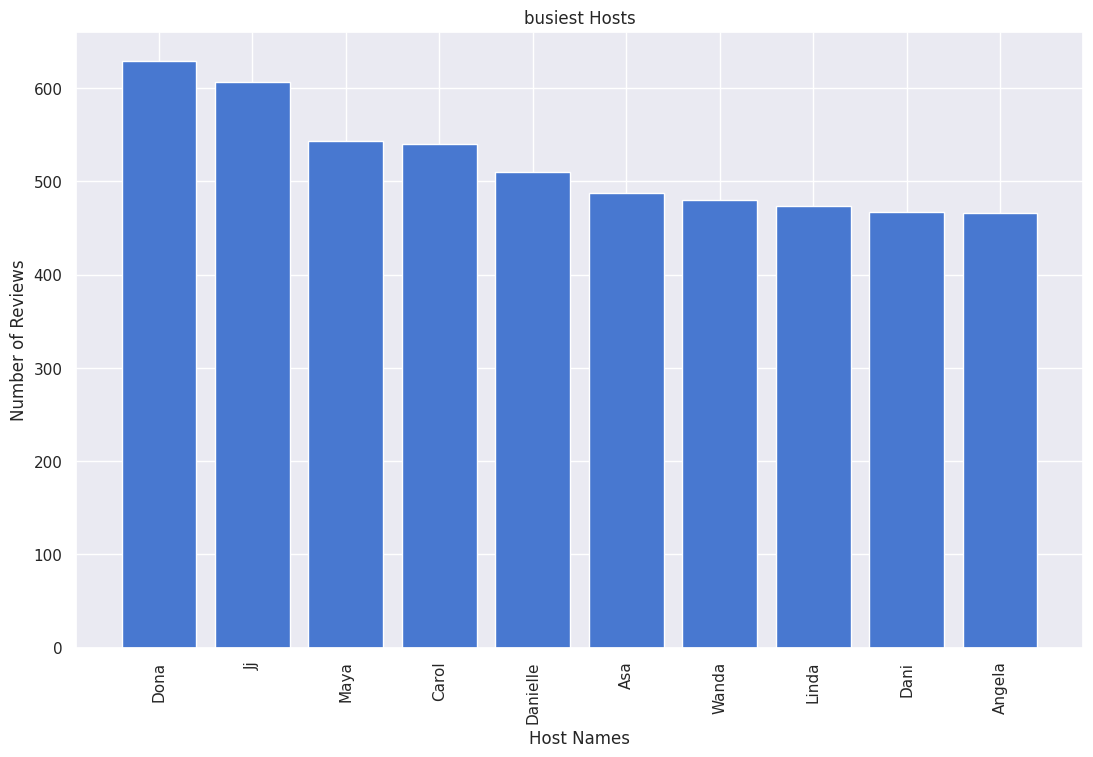

In [ ]:
host_name = busiest_hosts['host_name']
reviews = busiest_hosts['number_of_reviews']
plt.title('busiest Hosts')
plt.xlabel('Host Names')
plt.ylabel('Number of Reviews')
plt.bar(host_name, reviews)
plt.xticks(rotation=90)
plt.show()

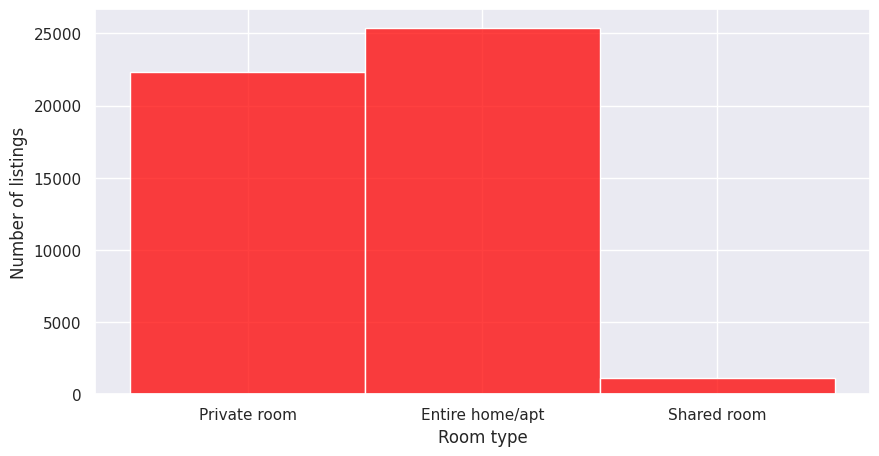

In [ ]:
plt.rcParams['figure.figsize']= (10,5)
hp= sns.histplot(data['room_type'], color = 'red')
hp.set_xlabel('Room type')
hp.set_ylabel('Number of listings')
plt.show()

In [ ]:
data.groupby(['neighbourhood_group' , 'neighbourhood', 'room_type'])['number_of_reviews'].max().reset_index().sort_values(by = 'number_of_reviews', ascending = False).head(10)

,neighbourhood_group,neighbourhood,room_type,number_of_reviews
398,Queens,Jamaica,Private room,629
273,Manhattan,Harlem,Private room,607
369,Queens,East Elmhurst,Private room,543
288,Manhattan,Lower East Side,Private room,540
214,Brooklyn,Park Slope,Entire home/apt,488
146,Brooklyn,Bushwick,Private room,480
379,Queens,Flushing,Private room,474
230,Brooklyn,South Slope,Entire home/apt,467
399,Queens,Jamaica,Shared room,454
259,Manhattan,East Village,Private room,451


In [ ]:
#Top 5 Expensive listing
data.nlargest(5,'price')[['name', 'neighbourhood_group', 'neighbourhood', 'host_name','room_type','price']]

,name,neighbourhood_group,neighbourhood,host_name,room_type,price
9151,Furnished room in Astoria apartment,Queens,Astoria,Kathrine,Private room,10000
17692,Luxury 1 bedroom apt. -stunning Manhattan views,Brooklyn,Greenpoint,Erin,Entire home/apt,10000
29238,1-BR Lincoln Center,Manhattan,Upper West Side,Jelena,Entire home/apt,10000
6530,Spanish Harlem Apt,Manhattan,East Harlem,Olson,Entire home/apt,9999
12342,"Quiet, Clean, Lit @ LES & Chinatown",Manhattan,Lower East Side,Amy,Private room,9999


In [ ]:
#Top 5 Cheapest listing
data.sort_values(by ='price',ascending=True)[['name', 'neighbourhood_group', 'neighbourhood', 'host_name','room_type','price']]

,name,neighbourhood_group,neighbourhood,host_name,room_type,price
24100,"Girls only, cozy room one block from Times Square",Manhattan,Hell's Kitchen,Mario,Shared room,10
32810,Gigantic Sunny Room in Park Slope-Private Back...,Brooklyn,Sunset Park,Rachel,Entire home/apt,10
33225,Voted #1 Airbnb In NYC,Queens,Jamaica,Maria,Entire home/apt,10
31066,"Very Spacious bedroom, steps from CENTRAL PARK.",Manhattan,Upper West Side,Salim,Private room,10
35601,"Charming, bright and brand new Bed-Stuy home",Brooklyn,Bedford-Stuyvesant,Caterina,Entire home/apt,10
2860,Large furnished 2 bedrooms- - 30 days Minimum,Manhattan,East Village,Sally,Entire home/apt,10
31407,Cozy feel at home studio,Manhattan,Kips Bay,Maureen,Private room,10
23256,"Quiet, Cozy UES Studio Near the Subway",Manhattan,Upper East Side,Amy,Entire home/apt,10
33505,Room with a view,Brooklyn,Williamsburg,Martin,Private room,10
47218,Beautiful room in Bushwick,Brooklyn,Bushwick,Julio,Private room,10


In [ ]:
df_n = data.groupby(['neighbourhood_group', 'neighbourhood'])['price'].mean().reset_index()
top_neigh_each= df_n.loc[df_n.groupby('neighbourhood_group')['price'].idxmax()].sort_values(by = 'price',ascending=False)
top_neigh_each

,neighbourhood_group,neighbourhood,price
188,Staten Island,Fort Wadsworth,800.000000
121,Manhattan,Tribeca,490.638418
88,Brooklyn,Sea Gate,487.857143
34,Bronx,Riverdale,442.090909
163,Queens,Neponsit,274.666667


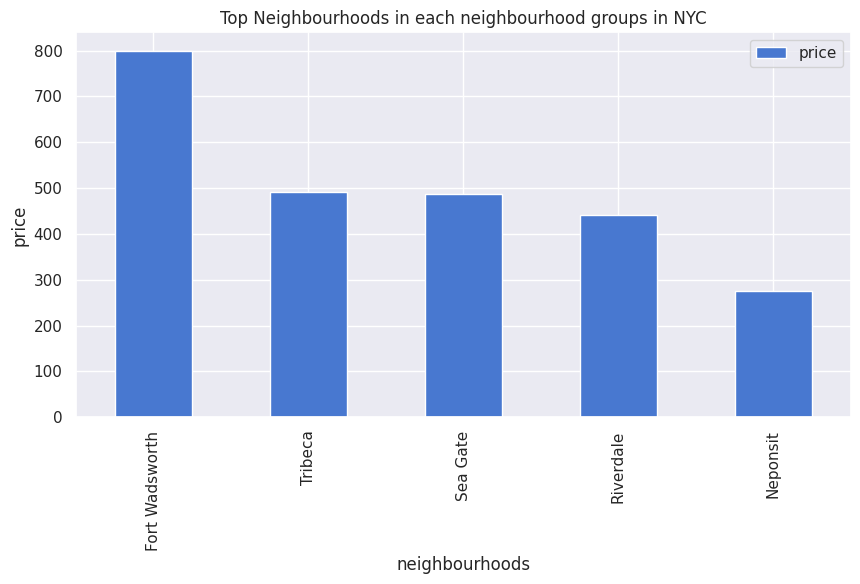

In [ ]:
top_neigh_each.plot.bar(x='neighbourhood',rot=90, title='Top Neighbourhoods in each neighbourhood groups in NYC')
plt.xlabel('neighbourhoods')
plt.ylabel('price')
plt.show()

In [ ]:
data.neighbourhood_group.value_counts()

Manhattan        21660
Brooklyn         20095
Queens            5666
Bronx             1090
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [ ]:
data['room_type'].value_counts()

Entire home/apt    25407
Private room       22319
Shared room         1158
Name: room_type, dtype: int64